**Leo Qian, Muqing Wen**

Spring 2023

CS 443: Bio-inspired Machine Learning

#### Week 3: Training model arm to reach for targets

# Project 3: Outstar Learning and Motor Control

In [26]:
import math
import numpy as np
import matplotlib.pyplot as plt

plt.style.use(['seaborn-v0_8-colorblind', 'seaborn-v0_8-darkgrid'])
plt.rcParams.update({'font.size': 16})
plt.show()

np.set_printoptions(suppress=True, precision=3)

# Automatically reload external modules
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Task 5: Train arm to reach for targets

In [27]:
from joint import Joint, EndEffector
from motor_neurons import MotorNeurons
from muscles import Muscles
from model_arm import Arm
from outstar import Outstar

### 5a. Implement and visualize the self-supervised training process

- Implement the `get_movement_dir` and `train` `Arm` methods in `model_arm.py`.
- Fill in the `make_arm` function below to handle creating the 3-jointed model arm starting in its default posture. Then in the next cell, make the arm and train it with default hyperparameters with a learning rate of `0.02`.

You should see an animation of your model arm babbling (similar to Week 1). Every 20 epochs you should see the posture of arm suddenly change. 

#### Review: Default posture joint and hand specifications

*This is identical to the specs from Week 1.*

**Shoulder:** Initial joint angle of $\pi/8$. Joint angle limited to the range $(-\pi/2, \pi)$.

**Elbow:** Initial joint angle of $\pi/2$. Joint angle limited to the range $(0, \pi)$. Length of upper arm (connecting elbow and shoulder) is 28 cm.

**Wrist:** Initial joint angle of $\pi/3$. Joint angle limited to the range $(-\pi/2, \pi/2)$. Length of lower arm (connecting wrist and elbow) is 28 cm.

**Hand:** Distance from end-of-hand to wrist is 16 cm.

In [28]:
def make_arm(lr):
    '''Makes and returns an `Arm` object with the default initial arm posture.
    
    Parameters:
    -----------
    lr: float. The learning rate used by the Outstar neural network.
    
    Returns:
    -----------
    Arm. The arm object.
    '''
    np.random.seed(0)
    shoulder = Joint('shoulder', np.pi/8, 0, angle_limits=[-np.pi/2, np.pi])
    elbow = Joint('elbow', np.pi/2, 28, angle_limits=[0, np.pi])
    wrist = Joint('wrist', np.pi/3, 28+28, angle_limits=[-np.pi/2, np.pi/2])
    hand = EndEffector('hand', 16+28+28)

    joints = [shoulder, elbow, wrist]
    
    muscles = Muscles()
    motor_neurons = MotorNeurons(joints, n_joint_angle_prefs=7, n_dir_angle_prefs=30, n_winners=3)
    outstar_net = Outstar(motor_neurons, muscles, lr)

    arm = Arm(joints, hand, outstar_net)

    return arm

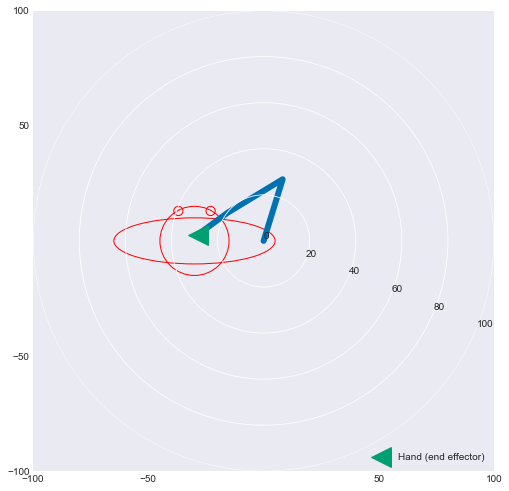

Training finished!


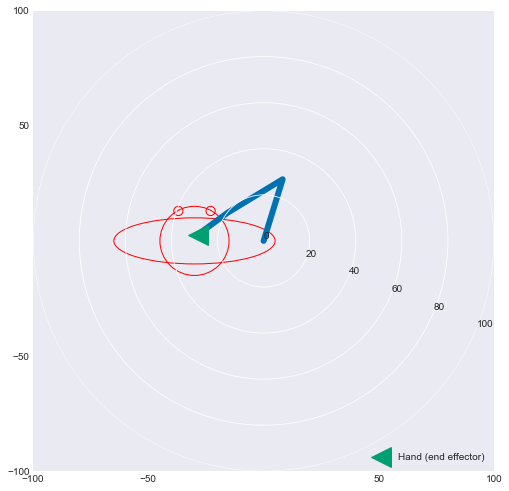

In [5]:
# %matplotlib notebook
%matplotlib inline
# TODO: Make Arm object with learning rate of 0.02
arm = make_arm(0.02)

# TODO: Train your Arm below
arm.train(epochs=100, randomize_joints_every=10, n_babbles=9, verbose=True, print_every=20, visualize=True)

### 5b. Complete a full training session

Use a learning rate of `0.02` again, but this time train for `10000` epochs. Turn off visualization on this training run so that the network trains much faster!

**Note:**
- Your network should at most take a few minutes to train.
- Use `print_every` to print out progress. Not too often otherwise the print outs will slow down training. Not too infrequently otherwise there's little point including the print outs :)

In [15]:
%matplotlib notebook
arm2 = make_arm(0.1)
arm2.train(epochs=2000, randomize_joints_every=10, n_babbles=9, verbose=True, print_every=20, visualize=False)

Starting to train network ....
Epoch 1/2000 start ...
Shoulder: [0. 0.], Elbow: [26.557 -8.872], Wrist: [5.391 9.459], Hand: [-5.535 21.147]
Shoulder: [0. 0.], Elbow: [26.488 -9.078], Wrist: [4.929 8.789], Hand: [-5.376 21.029]
Epoch 21/2000 start ...
Shoulder: [0. 0.], Elbow: [26.933  7.656], Wrist: [ 5.996 26.247], Hand: [-8.296 19.052]
Shoulder: [0. 0.], Elbow: [26.565  8.848], Wrist: [ 3.312 24.446], Hand: [-10.342  16.106]
Epoch 41/2000 start ...
Shoulder: [0. 0.], Elbow: [24.035 14.364], Wrist: [24.256 42.363], Hand: [30.88  56.927]
Shoulder: [0. 0.], Elbow: [24.368 13.791], Wrist: [26.169 41.733], Hand: [32.258 56.529]
Epoch 61/2000 start ...
Shoulder: [0. 0.], Elbow: [ 22.038 -17.272], Wrist: [47.867 -6.461], Hand: [52.835  8.748]
Shoulder: [0. 0.], Elbow: [ 22.211 -17.049], Wrist: [48.231 -6.707], Hand: [52.563  8.696]
Epoch 81/2000 start ...
Shoulder: [0. 0.], Elbow: [-17.135  22.145], Wrist: [-39.017  39.615], Hand: [-42.771  55.168]
Shoulder: [0. 0.], Elbow: [-16.957  22.28

### 5c. Implement `test`: Run network in prediction mode to reach for targets

#### Test: Use trained arm to reach for four targets

If everything is working as expected, you should see the hand move to successfully intercept each target one-by-one!

*Remember to pass all the target positions into the `ArmPlot` update method so that they appear on the plot as red disks!*

In [21]:
all_target_pos = np.array([[-20, 60], [20, 60], [-20, 20], [20, 20]])
arm2.test(all_target_pos, target_dist_tol=2.0, visualize=False, verbose=True)

Start reaching...
1/4, currently reaching for [-20  60]
Number of times tried: 37 
Distance from hand to target: 1.07

2/4, currently reaching for [20 60]
Number of times tried: 14 
Distance from hand to target: 0.46

3/4, currently reaching for [-20  20]
Number of times tried: 50 
Distance from hand to target: 1.53

4/4, currently reaching for [20 20]
Number of times tried: 88 
Distance from hand to target: 0.62

Finished all reaching


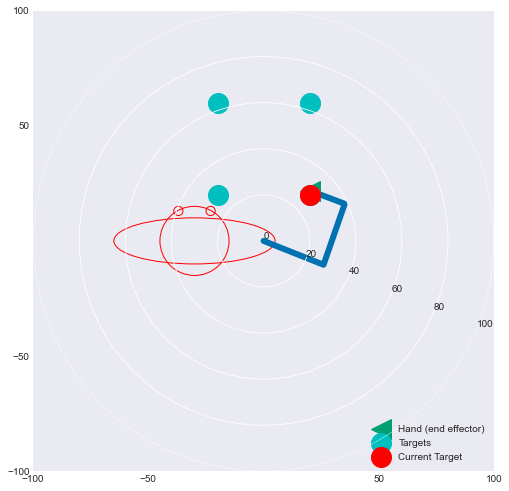

Finished all reaching


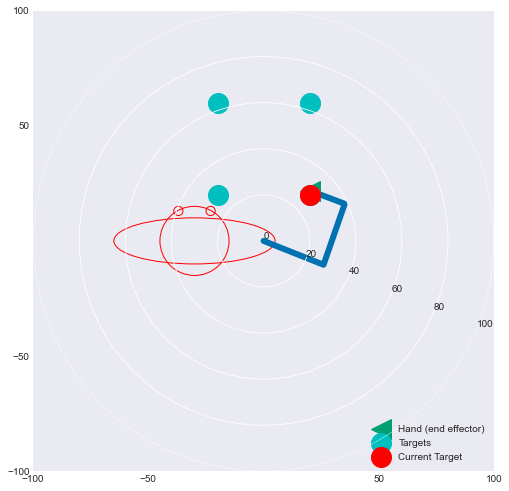

In [23]:
# %matplotlib notebook
%matplotlib inline
all_target_pos = np.array([[-20, 60], [20, 60], [-20, 20], [20, 20]])
arm2.test(all_target_pos)

#### Here's a video of how the arm should behave:
"https://www.youtube.com/watch?v=yaZpczFRO-8"

### 5d. Questions

**Question 9:** Now that you have hands-on experience seeing how the training protocol translates to arm reaching capability, in your own words briefly describe the self-supervised learning process â€” how the arm learns by generating its own data.

**Answer 9:** Every time when the hands reach a position in the training stage, we would tell the network that the hands position is the correct target given the hands position after the babble and the angle in respect to the old one. Through training, the network knows how to map motor neuron activation to muscle activation that makes the hand reaching the target.

Essentially, the arm learns the **result** of each **movement**. We let the arm move randomly (random muscle activations), and then record the state of the arm before and after training. This way, the arm will eventually learn what muscles it should activate when it wants to move to a certain **direction**, given its **intial state (intial joint angles)**.

## Task 6: Self-designed experiment

Explore the capabilities of your model arm in an experiment that you design. **This task does not require you implementing any new features â€” keep it simple!** There are many interesting questions to explore by simplying changing hyperparameters and interpreting what you find. Briefly report what the idea behind the experiment (i.e. why did you run the experiment?), what you thought would happen (i.e. your hypothesis), and what you found.

#### First, save the trained wts!

In [24]:
trained_wts = arm2.outstar_net.get_wts()

In [25]:
np.save('results/trained_wts', trained_wts)

#### Test the trained wts

In [26]:
loaded_wts = np.load('results/trained_wts.npy')
print(loaded_wts.shape)

(10290, 6)


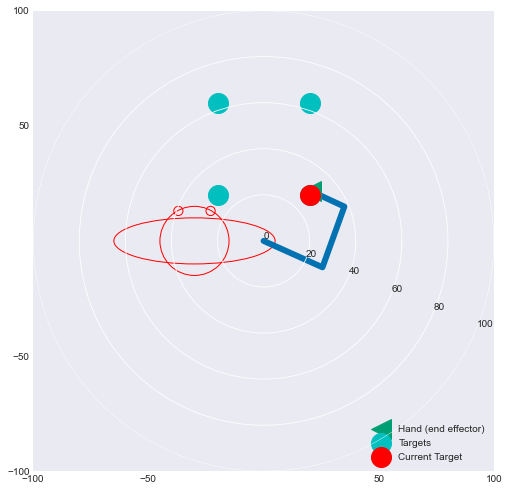

Finished all reaching


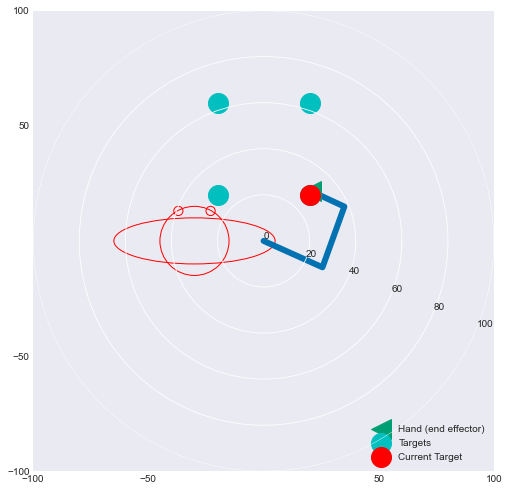

In [29]:
%matplotlib inline
arm3 = make_arm(0.1)
arm3.outstar_net.set_wts(loaded_wts)

all_target_pos = np.array([[-20, 60], [20, 60], [-20, 20], [20, 20]])
arm3.test(all_target_pos)

### Next, try reaching for differnt targets.

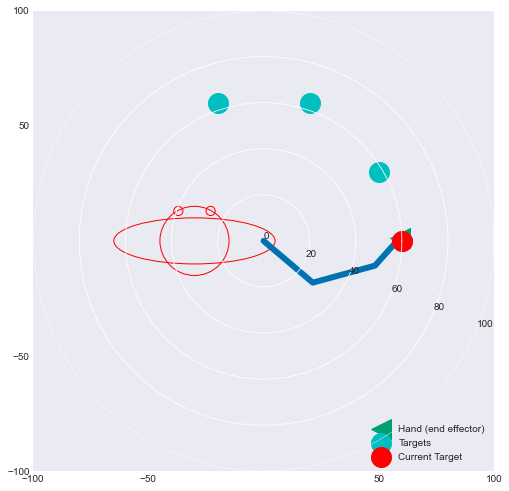

Finished all reaching


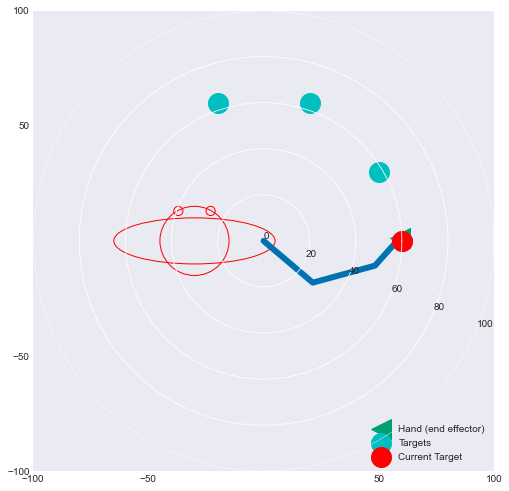

In [35]:
all_target_pos = np.array([[-20, 60], [20, 60], [50, 30], [60, 0]])
arm3.test(all_target_pos)

### Try learning while training

#### Test without training

In [40]:
loaded_wts = np.load('results/trained_wts.npy')
arm4 = make_arm(0.1)
arm4.outstar_net.set_wts(loaded_wts)

In [41]:
np.random.seed(0)
all_target_pos = np.array([[-20, 60], [20, 60], [50, 30], [60, 0]])
arm4.test(all_target_pos, visualize=False, train=False)

Start reaching...
1/4, currently reaching for [-20  60]
Number of times tried: 37 
Distance from hand to target: 1.07

2/4, currently reaching for [20 60]
Number of times tried: 14 
Distance from hand to target: 0.46

3/4, currently reaching for [50 30]
Number of times tried: 16 
Distance from hand to target: 1.48

4/4, currently reaching for [60  0]
Number of times tried: 8 
Distance from hand to target: 1.56

Finished all reaching


### Test with Training
Does the hand reach the target faster?

In [29]:
loaded_wts = np.load('results/trained_wts.npy')
arm5 = make_arm(0.1)
arm5.outstar_net.set_wts(loaded_wts)

In [30]:
np.random.seed(0)
all_target_pos = np.array([[-20, 60], [20, 60], [50, 30], [60, 0]])
arm5.test(all_target_pos, visualize=False, train=True)

Start reaching...
1/4, currently reaching for [-20  60]
Number of times tried: 30 
Distance from hand to target: 0.51

2/4, currently reaching for [20 60]
Number of times tried: 16 
Distance from hand to target: 0.95

3/4, currently reaching for [50 30]
Number of times tried: 12 
Distance from hand to target: 0.91

4/4, currently reaching for [60  0]
Number of times tried: 8 
Distance from hand to target: 1.87

Finished all reaching


#### Additional Test with original targets

#### Test without updating weights

In [4]:
loaded_wts = np.load('results/trained_wts.npy')
arm6 = make_arm(0.1)
arm6.outstar_net.set_wts(loaded_wts)

In [6]:
np.random.seed(0)
all_target_pos = np.array([[-20, 60], [20, 60], [-20, 20], [20, 20]])
arm6.test(all_target_pos, visualize=False, train=False)

Start reaching...
1/4, currently reaching for [-20  60]
Number of times tried: 37 
Distance from hand to target: 1.07

2/4, currently reaching for [20 60]
Number of times tried: 14 
Distance from hand to target: 0.46

3/4, currently reaching for [-20  20]
Number of times tried: 49 
Distance from hand to target: 1.60

4/4, currently reaching for [20 20]
Number of times tried: 52 
Distance from hand to target: 1.99

Finished all reaching


#### Test with weight updates

In [49]:
loaded_wts = np.load('results/trained_wts.npy')
arm7 = make_arm(0.1)
arm7.outstar_net.set_wts(loaded_wts)

### Trial: 1

In [50]:
np.random.seed(0)
all_target_pos = np.array([[-20, 60], [20, 60], [-20, 20], [20, 20]])
arm7.test(all_target_pos, visualize=False, train=True)

Start reaching...
1/4, currently reaching for [-20  60]
Number of times tried: 30 
Distance from hand to target: 0.51

2/4, currently reaching for [20 60]
Number of times tried: 16 
Distance from hand to target: 0.95

3/4, currently reaching for [-20  20]
Number of times tried: 46 
Distance from hand to target: 1.36

4/4, currently reaching for [20 20]
Number of times tried: 65 
Distance from hand to target: 0.99

Finished all reaching


### Trial: 2

In [51]:
np.random.seed(0)
all_target_pos = np.array([[-20, 60], [20, 60], [-20, 20], [20, 20]])
arm7.test(all_target_pos, visualize=False, train=True)

Start reaching...
1/4, currently reaching for [-20  60]
Number of times tried: 19 
Distance from hand to target: 0.92

2/4, currently reaching for [20 60]
Number of times tried: 7 
Distance from hand to target: 0.16

3/4, currently reaching for [-20  20]
Number of times tried: 55 
Distance from hand to target: 0.96

4/4, currently reaching for [20 20]
Number of times tried: 56 
Distance from hand to target: 1.46

Finished all reaching


### Trial: 3

In [52]:
np.random.seed(0)
all_target_pos = np.array([[-20, 60], [20, 60], [-20, 20], [20, 20]])
arm7.test(all_target_pos, visualize=False, train=True)

Start reaching...
1/4, currently reaching for [-20  60]
Number of times tried: 14 
Distance from hand to target: 1.57

2/4, currently reaching for [20 60]
Number of times tried: 11 
Distance from hand to target: 1.35

3/4, currently reaching for [-20  20]
Number of times tried: 26 
Distance from hand to target: 0.68

4/4, currently reaching for [20 20]
Number of times tried: 108 
Distance from hand to target: 0.91

Finished all reaching


### Trial: 4

In [53]:
np.random.seed(0)
all_target_pos = np.array([[-20, 60], [20, 60], [-20, 20], [20, 20]])
arm7.test(all_target_pos, visualize=False, train=True)

Start reaching...
1/4, currently reaching for [-20  60]
Number of times tried: 11 
Distance from hand to target: 1.96

2/4, currently reaching for [20 60]
Number of times tried: 10 
Distance from hand to target: 1.62

3/4, currently reaching for [-20  20]
Number of times tried: 16 
Distance from hand to target: 1.97

4/4, currently reaching for [20 20]
Number of times tried: 22 
Distance from hand to target: 1.77

Finished all reaching


### Trial: 5

In [54]:
np.random.seed(0)
all_target_pos = np.array([[-20, 60], [20, 60], [-20, 20], [20, 20]])
arm7.test(all_target_pos, visualize=False, train=True)

Start reaching...
1/4, currently reaching for [-20  60]
Number of times tried: 12 
Distance from hand to target: 1.56

2/4, currently reaching for [20 60]
Number of times tried: 12 
Distance from hand to target: 1.75

3/4, currently reaching for [-20  20]
Number of times tried: 14 
Distance from hand to target: 1.49

4/4, currently reaching for [20 20]
Number of times tried: 12 
Distance from hand to target: 0.65

Finished all reaching


### Trial: 6

In [55]:
np.random.seed(0)
all_target_pos = np.array([[-20, 60], [20, 60], [-20, 20], [20, 20]])
arm7.test(all_target_pos, visualize=False, train=True)

Start reaching...
1/4, currently reaching for [-20  60]
Number of times tried: 9 
Distance from hand to target: 1.54

2/4, currently reaching for [20 60]
Number of times tried: 12 
Distance from hand to target: 1.64

3/4, currently reaching for [-20  20]
Number of times tried: 14 
Distance from hand to target: 1.17

4/4, currently reaching for [20 20]
Number of times tried: 9 
Distance from hand to target: 1.92

Finished all reaching


### Visualize Result

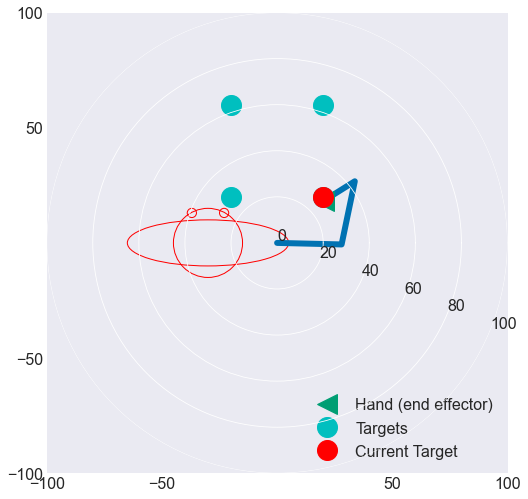

Finished all reaching


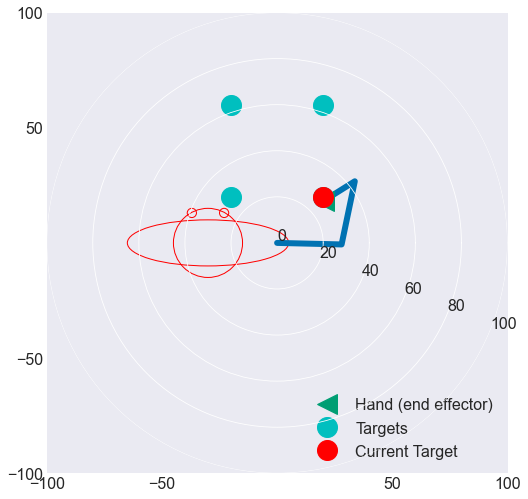

In [59]:
all_target_pos = np.array([[-20, 60], [20, 60], [-20, 20], [20, 20]])
arm7.test(all_target_pos, visualize=True, train=False)

#### Conclusion:
Even though testing while training does not appear to reduce the number of movements it takes to reach all the targets at first, the result improved significantly after 4 trials (testing while training with the same targets 4 times). This means the network became much more efficient at reaching for the same targets.

## Extensions

### 1. Make the visualization fancier

Color code current target reached for, reveal only the next target, include a dynamic plot of distance to the target, mark previous targets, etc.

### 2. Hyperparameter exploration

Do a hyperparameter search. Because this is not a supervised learning task, you will need to invent your own performance metric the quantifies how well the model arm performs (e.g. time to grasp target).

### 3. Learning and development

Explore more extensively how degree of training ("development") influences how well the model arm reaches. Evaluate this using your own metrics.

### 4.Implement mini-batch support for faster training

In the training algorithm, each epoch corresponds to a new random starting position for the arm, which is then followed by `n_babbles` babbles. In the project, this is implemented sequentially (SGD style), however, training can happen in mini-batches, which should speed up training. To add support for mini-batches, the idea is to create a training set in advance of the training process wherein the random muscle activations, joint angles, and positions are precomputed (each combination of these become a "training sample"). This is basically what you do one-by-one in `train` currently. As long as you store both the previous and current position of the arm before/after each babble (or just make the net movement direction the feature), you should be able to train the Outstar network with samples in any shuffled order.

Another important step in adding mini-batch support is updating the `net_in`, `net_act`, and weight update code to support the batch dimension.

If mini-batch support is added, it would be interesting to compare training time vs. the approach in the base project.

It would also be interesting to explore whether writing the training code (with mini-batch support) in TensorFlow would further decrease training time.  

### 5. Effect of source and sink magnitude

In the simple network used in Task 4, the source activations were consistent in train and prediction phases. Analyze what happens as the magnitude of the source activations fluctuate over presentations in train and/or prediction. What are essential conditions for learning to occur?

### 6. Randomness in feature vectors

In the simple network used in Task 4, both source and sink activation feature vectors were constant across presentations. Explore how/what the network learns when randomness is added to each feature vector so that it differs on each presentation but averages out to be the vectors you used earlier over many repeated presentations.

### 7. More elaborate experiment

Design a more elaborate experiment than the one used in Task 6.